# Exploratory Data Analysis on walmart stores and sales data

In this notebook, conducting the exploratory data analysis on a subset of stores and their weekly sales record by department.

# Table of Contents

- [Exploring Sales Data](#sales_data)
- [Exploring Store data](#store_data)
- Exploratory Analysis of Walmart Stores and Sales Data
    - [Relationship between Store Type and Store Size](#type_size_rel)
    - [Weekly Sales and Store Size](#weekly_sales_vs_size)
    - [Data distribution](#dist) 
    - [Data correlation](#dcorr) 
    - [How do sales vary based on holiday?](#sale_vs_holiday)
    - [How do sales vary by day of the week?](#sale_vs_dayOfWeek)
    - [How does the Size of Store Impacts its sales?](#sale_vs_store_size)
    - [How are sales on Weekend?](#weekend_sale)
    - [Visulaize aggregated impact of different categorical varibales on sales](#sale_vs_cat_cols)
    - [Number of Sales per Date](#sale_per_day)
    - [Monthly Number of Sales](#monthly_sale)
- [Final Conclusion](#conc)
        


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='sales_data'></a>
## Exploring Sales data

**Data Dictionary**
- Store - the store number
- Dept - the department number
- Date - A date
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

In [2]:
#Read sales data
sales = pd.read_csv("data/sales.csv")

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421568 entries, 0 to 421567
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421568 non-null  int64  
 1   Dept          421568 non-null  int64  
 2   Date          421568 non-null  object 
 3   Weekly_Sales  421568 non-null  float64
 4   IsHoliday     421568 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,12/02/2010,46039.49,True
1,1,1,19/02/2010,41595.55,False
2,1,1,26/02/2010,19403.54,False
3,1,1,05/03/2010,21827.90,False
4,1,1,12/03/2010,21043.39,False


In [5]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421568.000000,421568.000000,421568.000000
mean,22.200542,44.260523,15981.229443
std,12.785238,30.491981,22711.232698
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.632500
50%,22.000000,37.000000,7612.020000
75%,33.000000,74.000000,20205.837500
max,45.000000,99.000000,693099.360000


**How many Stores and Departments are there?**

In [6]:
'''Number of stores:'''
len(sales['Store'].unique())

45

In [7]:
'''No. of Dept'''
len(sales['Dept'].unique())

81

**How many store and department combinations only have one row in sales dataset?**

In [8]:
'''Rows where unique store and Dept has only one row'''
len(sales.groupby(by=['Store', 'Dept']).filter(lambda x: x['Dept'].count() == 1))

37

In [9]:
#let's see some of these rows
sales.groupby(by=['Store', 'Dept']).filter(lambda x: x['Dept'].count() ==1).head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
27834,3,78,02/04/2010,6.00,False
28285,3,83,18/05/2012,19.33,False
34789,4,39,10/12/2010,1.56,False
47130,5,78,26/02/2010,6.00,False
66512,7,78,28/05/2010,12.00,False


**The beginning and end date for the sales data**

In [10]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [11]:
'''What is the beginning and end date for the sales data?'''
sales['Date'].min() , sales['Date'].max()

(Timestamp('2010-01-10 00:00:00'), Timestamp('2012-12-10 00:00:00'))

In [12]:
'''Add a column named "weekday" to indicate weekday(e.g. Monday, Friday)'''

sales['day_name'] = sales['Date'].dt.day_name() 
sales['day_ind'] = sales['Date'].dt.dayofweek
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,day_name,day_ind
0,1,1,2010-12-02,46039.49,True,Thursday,3
1,1,1,2010-02-19,41595.55,False,Friday,4
2,1,1,2010-02-26,19403.54,False,Friday,4
3,1,1,2010-05-03,21827.90,False,Monday,0
4,1,1,2010-12-03,21043.39,False,Friday,4


In [13]:
# gives unique number of days in dataset
len(sales['Date'].unique())

143

<a id='store_data'> </a>
## Exploring Store data

Information about the 45 stores, indicating the type and size of store

In [14]:
stores = pd.read_csv("data/stores.csv")

In [15]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Store   48 non-null     float64
 1   Type    47 non-null     object 
 2   Size    48 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [16]:
stores.head()

,Store,Type,Size
0,1.0,A,151315.0
1,2.0,A,202307.0
2,3.0,B,37392.0
3,4.0,A,205863.0
4,5.0,B,34875.0


In [17]:
stores.describe()

,Store,Size
count,48.000000,48.000000
mean,21.916667,130346.479167
std,13.436744,64370.672727
min,1.000000,34875.000000
25%,10.750000,67334.000000
50%,21.500000,127309.500000
75%,33.250000,202356.500000
max,45.000000,219622.000000


In [18]:
'''
How many unique types of stores we have?
'''
stores['Type'].unique()

array(['A', 'B', 'C', nan], dtype=object)

In [19]:
'''
Stores min and max size
'''
stores['Size'].min() , stores['Size'].max()

(34875.0, 219622.0)

In [20]:
'''
For how many unique stores we have data?
'''
len(stores['Store'].unique())

45

In [21]:
'''
Extract stores that have Type= nan
''' 
stores[stores['Type'].isnull()]

,Store,Type,Size
47,1.0,NaN,151315.0


In [22]:
'''
Extract stores that have more than one type 
'''
stores.groupby('Store')['Store'].filter(lambda x: x.count() > 1).unique()

array([ 1.,  5., 11.])

In [23]:
stores[stores['Store'].isin( [1,5,11])]

,Store,Type,Size
0,1.0,A,151315.0
4,5.0,B,34875.0
10,11.0,A,207499.0
45,5.0,B,34875.0
46,11.0,A,207499.0
47,1.0,NaN,151315.0


<font color='red'> Stores 1 </font> has one NaN row and it can be deleted

<font color='red'> Store 5 and 11 </font> have duplicate rows and they can de dropped

In [24]:
stores.drop_duplicates(inplace=True)
stores.dropna(inplace=True)

In [25]:
len(stores['Store'].unique())

45

<a id='type_size_rel'></a>
### Relationship between Store Type and Store Size

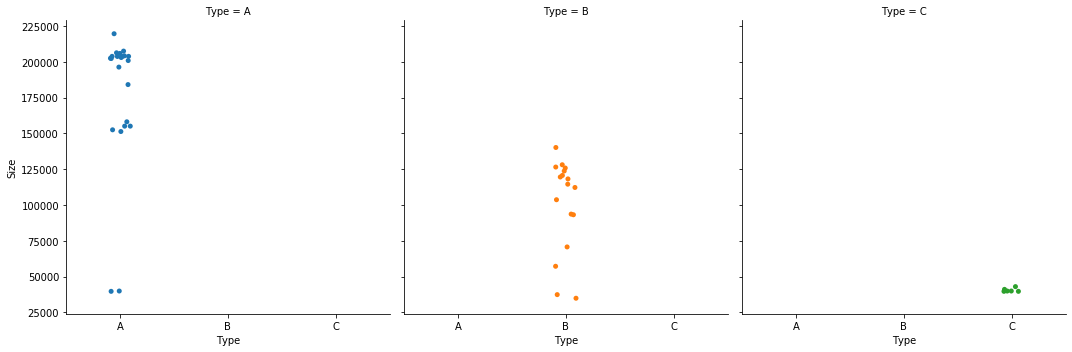

In [26]:
sns.catplot(data= stores, x= 'Type', y='Size', col ='Type')
plt.show()

- <font color='red'> Store Type 'A' </font> are **mostly** of large sizes 
- <font color='red'> Store Type 'B' </font> are medium size stores compared to A and C, smaller than A and **mostly** larger than C
- <font color='red'> Store Type 'C' </font>  are smaller size stores

In [27]:
walmart = pd.merge(sales,stores, how ='inner', on ='Store')

In [28]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421568 entries, 0 to 421567
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421568 non-null  int64         
 1   Dept          421568 non-null  int64         
 2   Date          421568 non-null  datetime64[ns]
 3   Weekly_Sales  421568 non-null  float64       
 4   IsHoliday     421568 non-null  bool          
 5   day_name      421568 non-null  object        
 6   day_ind       421568 non-null  int64         
 7   Type          421568 non-null  object        
 8   Size          421568 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 29.3+ MB


In [29]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,day_name,day_ind,Type,Size
0,1,1,2010-12-02,46039.49,True,Thursday,3,A,151315.0
1,1,1,2010-02-19,41595.55,False,Friday,4,A,151315.0
2,1,1,2010-02-26,19403.54,False,Friday,4,A,151315.0
3,1,1,2010-05-03,21827.90,False,Monday,0,A,151315.0
4,1,1,2010-12-03,21043.39,False,Friday,4,A,151315.0


<a id='weekly_sales_vs_size'></a>
### Weekly Sales and Store Size 

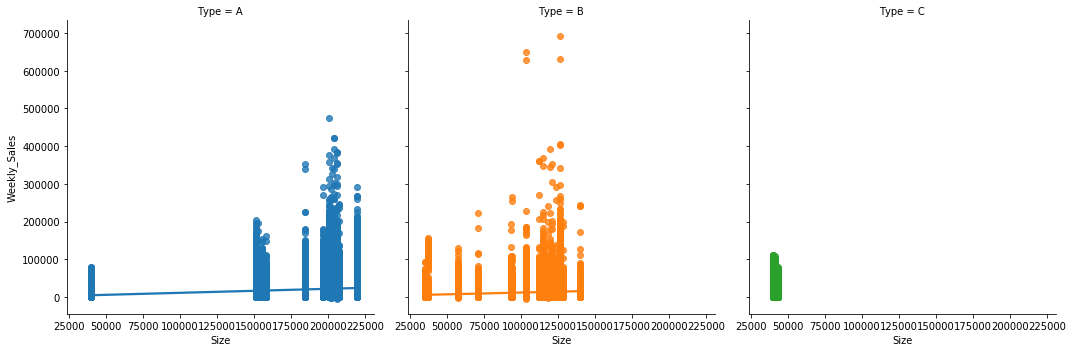

In [30]:
sns.lmplot(data=walmart, x='Size', y='Weekly_Sales', hue='Type', col='Type')
plt.show()

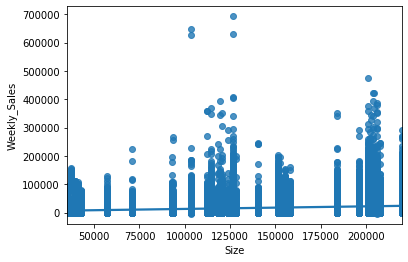

In [31]:
sns.regplot(data=walmart, x='Size', y='Weekly_Sales')
plt.show()

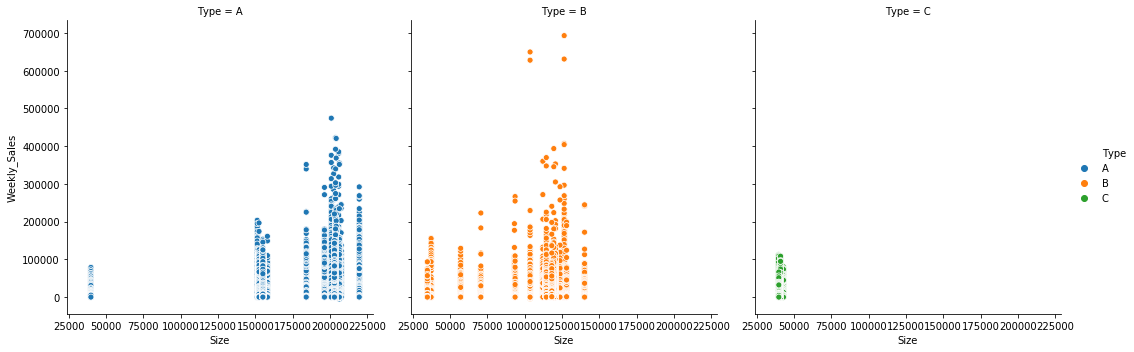

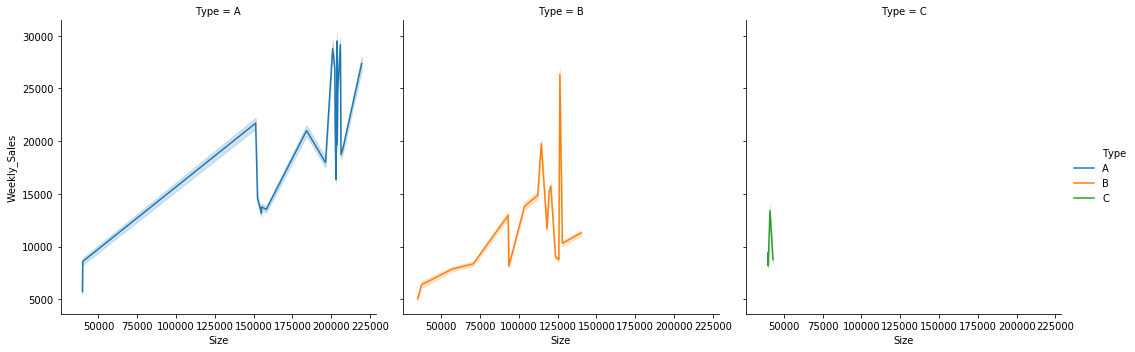

In [32]:
sns.relplot(data=walmart,x='Size', y='Weekly_Sales', hue='Type', col='Type')
sns.relplot(data=walmart,x='Size', y='Weekly_Sales', hue='Type', col='Type', kind='line' )
plt.show()

In [33]:
np.corrcoef(walmart['Size'], walmart['Weekly_Sales'])

array([[1.        , 0.24382796],
       [0.24382796, 1.        ]])

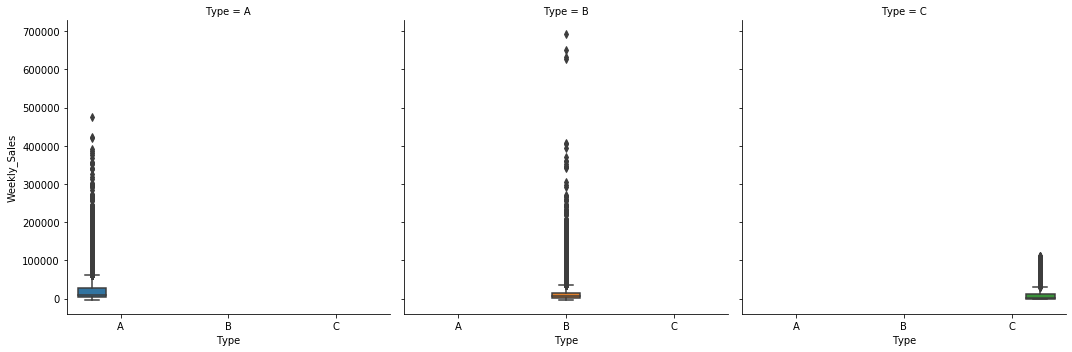

In [34]:
sns.catplot(data=walmart, x='Type', y='Weekly_Sales', hue='Type', col='Type', kind='box')
plt.show()

<p style="color: blue; font-size: 20px"> Based on above, it seems that weekly_sales are not strongly related to store size </p>

**Let's add Isweekend column and convert other columns to proper types**

In [35]:
# add isWeekend column 
walmart['IsWeekend'] = np.select([(walmart['Date'].dt.dayofweek).isin([5,6])], 
                        [True], default=False)
    

In [36]:
# change column types to categorical 
cat_type= ['IsHoliday', 'day_ind','IsWeekend', 'Type']
for cat in cat_type:
    walmart[cat] = pd.Categorical(walmart[cat])

walmart.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421568 entries, 0 to 421567
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421568 non-null  int64         
 1   Dept          421568 non-null  int64         
 2   Date          421568 non-null  datetime64[ns]
 3   Weekly_Sales  421568 non-null  float64       
 4   IsHoliday     421568 non-null  category      
 5   day_name      421568 non-null  object        
 6   day_ind       421568 non-null  category      
 7   Type          421568 non-null  category      
 8   Size          421568 non-null  float64       
 9   IsWeekend     421568 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 44.1+ MB


In [37]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,day_name,day_ind,Type,Size,IsWeekend
0,1,1,2010-12-02,46039.49,True,Thursday,3,A,151315.0,False
1,1,1,2010-02-19,41595.55,False,Friday,4,A,151315.0,False
2,1,1,2010-02-26,19403.54,False,Friday,4,A,151315.0,False
3,1,1,2010-05-03,21827.90,False,Monday,0,A,151315.0,False
4,1,1,2010-12-03,21043.39,False,Friday,4,A,151315.0,False


<a id='dist'></a>
## Data Distribution

In [38]:
walmart.groupby('Type').size()

Type
A    215477
B    163494
C     42597
dtype: int64

In [39]:
# percentage of data by each store Type
(walmart.groupby('Type').size() /len(walmart)) *100

Type
A    51.113225
B    38.782355
C    10.104420
dtype: float64

In [40]:
'''
Number of Store-Departments that don't have data for all days
'''
len(walmart.groupby(['Store', 'Dept'])['Dept'].filter(lambda x: x.count() < len(walmart['Date'].unique())).unique())

58

In [41]:
pd.crosstab(walmart['IsHoliday'], walmart['Type'])

Type,A,B,C
IsHoliday,,,
False,200292,151982,39633
True,15185,11512,2964


In [42]:
pd.crosstab(walmart['IsWeekend'], walmart['Type'])

Type,A,B,C
IsWeekend,,,
False,192892,146376,38177
True,22585,17118,4420


In [43]:
pd.crosstab(walmart['day_name'], walmart['Type'])

Type,A,B,C
day_name,,,
Friday,144558,109799,28626
Monday,16678,12633,3332
Saturday,9042,6849,1754
Sunday,13543,10269,2666
Thursday,15102,11421,2996
Tuesday,13534,10241,2638
Wednesday,3020,2282,585


In [44]:
pd.crosstab([walmart['IsWeekend'], walmart['IsHoliday']], walmart['Type'])

Type                      A       B      C
IsWeekend IsHoliday                       
False     False      179217  136003  35501
          True        13675   10373   2676
True      False       21075   15979   4132
          True         1510    1139    288

- 51% of data is for store Type 'A'
- Overall we have very less data for store Type C
- There is a lot of data for Fridays for all store Types


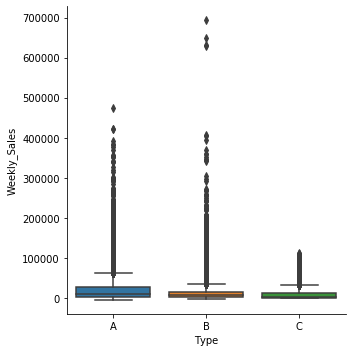

In [45]:
sns.catplot(data=walmart, x='Type', y='Weekly_Sales', kind='box')
plt.show()

- The higher sales are just outliers or do they coincide with some other attributes ?

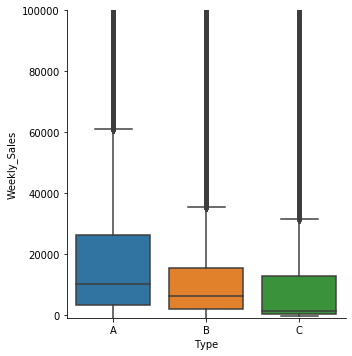

In [46]:
sns.catplot(data=walmart, x='Type', y='Weekly_Sales', kind='box')
plt.ylim(-1000, 100000)
plt.show()

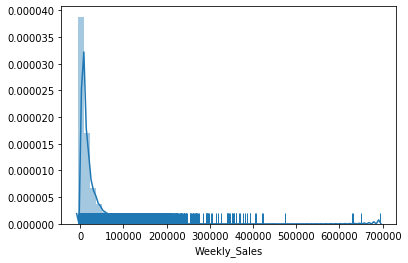

In [47]:
sns.distplot(walmart['Weekly_Sales'],rug=True )
plt.show()

- The box plot above and the distplot show that weekly_sales above ~25 thousand are not very frequent


<a id='dcorr'></a>
## Data Correlations

In [48]:
walmart.corr(method='pearson')

,Store,Dept,Weekly_Sales,Size
Store,1.000000,0.024004,-0.085195,-0.182881
Dept,0.024004,1.000000,0.148035,-0.002967
Weekly_Sales,-0.085195,0.148035,1.000000,0.243828
Size,-0.182881,-0.002967,0.243828,1.000000


- Weekly_Sales has very weak correlation with Size of the store 

/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/adeela/anaconda3/lib/python3.7/site-pa

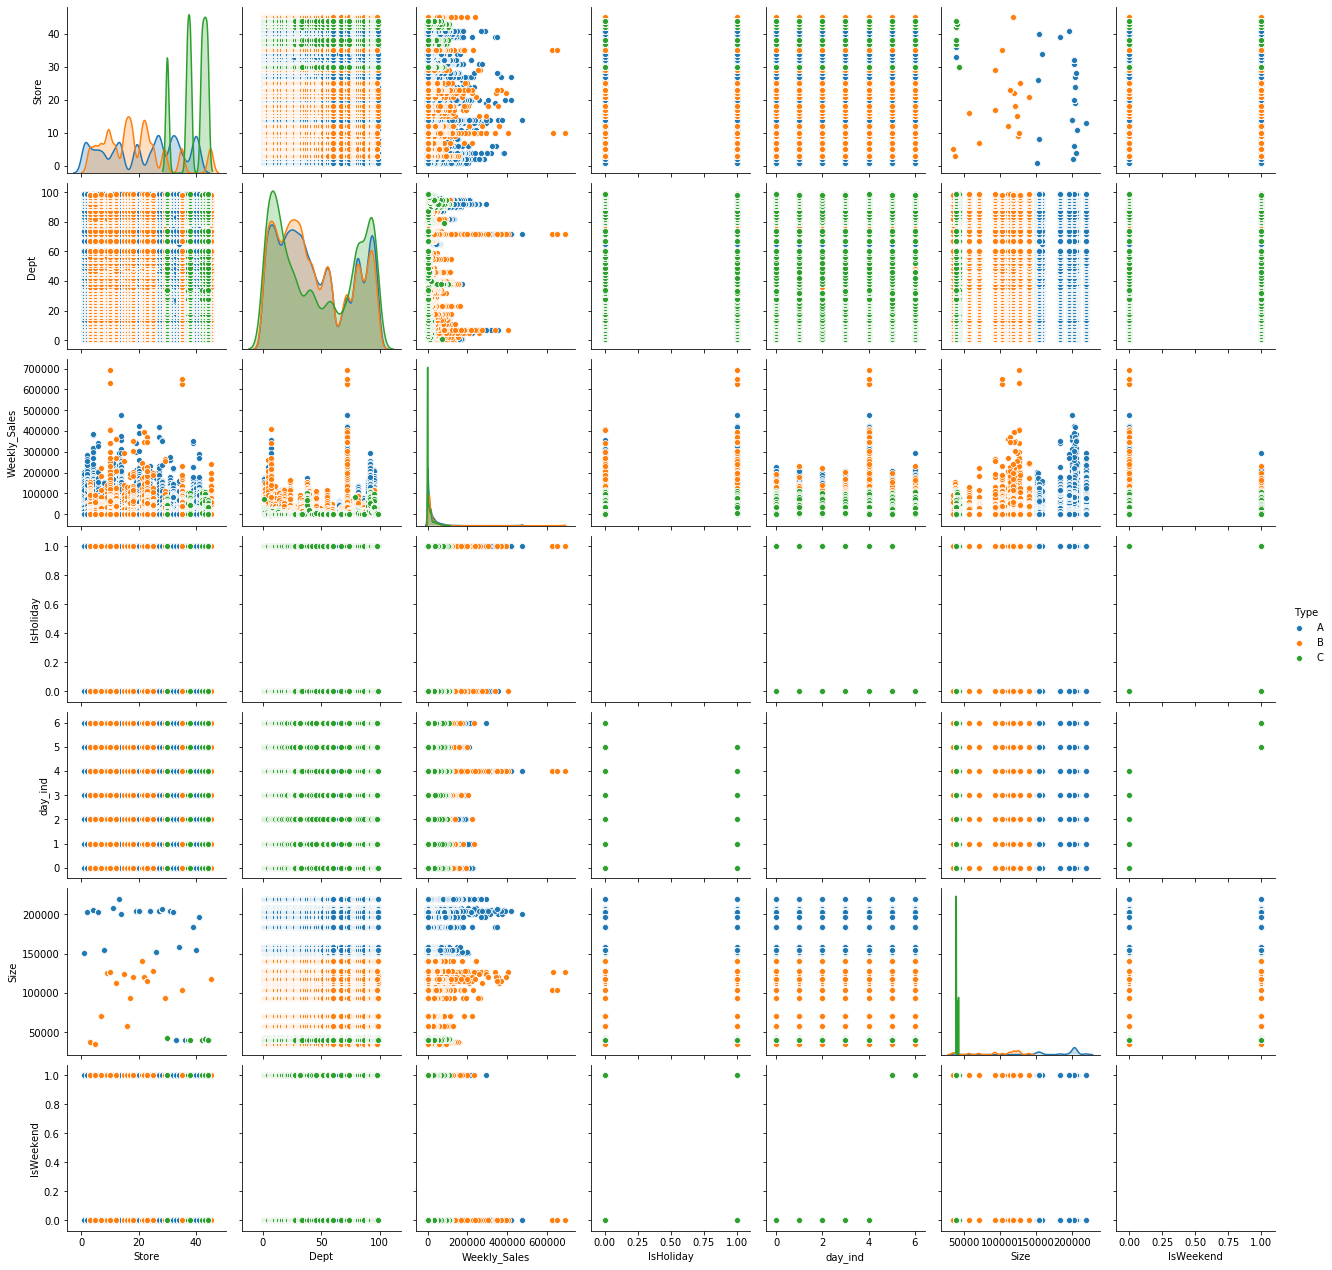

In [49]:
sns.pairplot(data=walmart, hue='Type')
plt.show()

/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/adeela/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


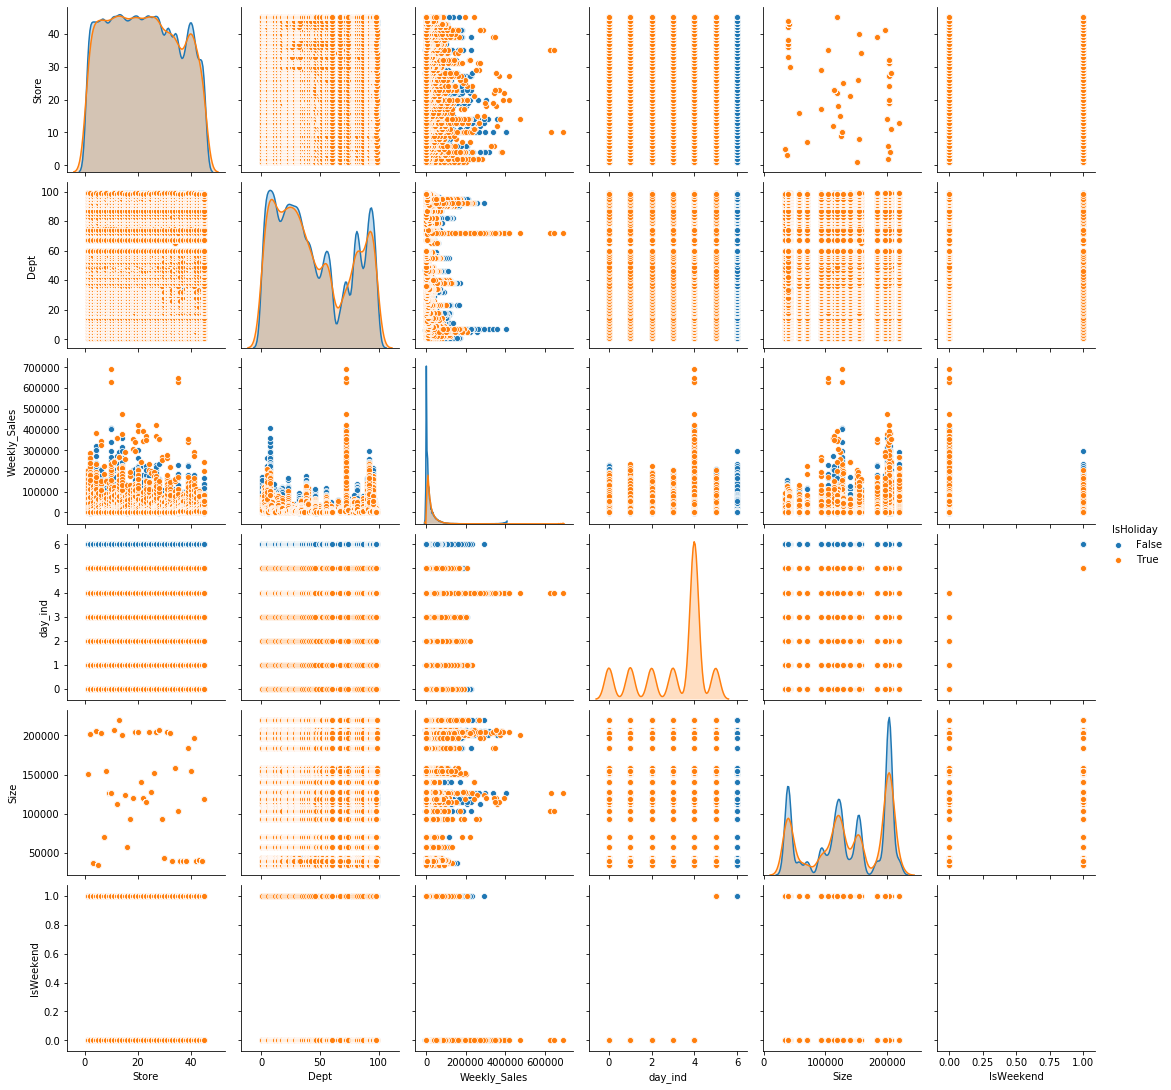

In [50]:
sns.pairplot(data=walmart, hue='IsHoliday')
plt.show()

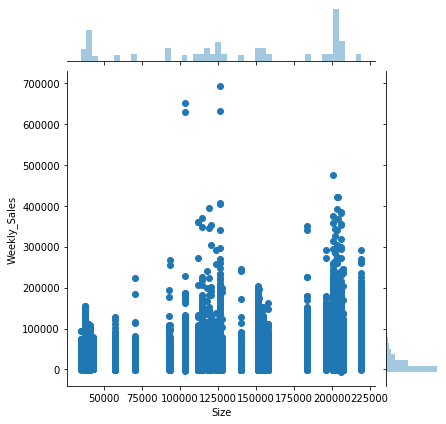

In [51]:
sns.jointplot(data = walmart, x='Size', y='Weekly_Sales')
plt.show()

- As we can see, weekly sales do increase on holidays
- Fridays also have higher weekly_sales 
- Weekend seems to have no impact on sales. Infact sales are less on weekends
- Size vs Weekly_sales does not show much clear information 
- Weekly sales do depend on the Type of store 
- Store Type 'B' has higher Weekly Sales  compared to other types 

Let's explore these at a granular level

<a id='sale_vs_holiday'></a>
## How do sales vary based on holiday? 
- Impact of IsHoliday column

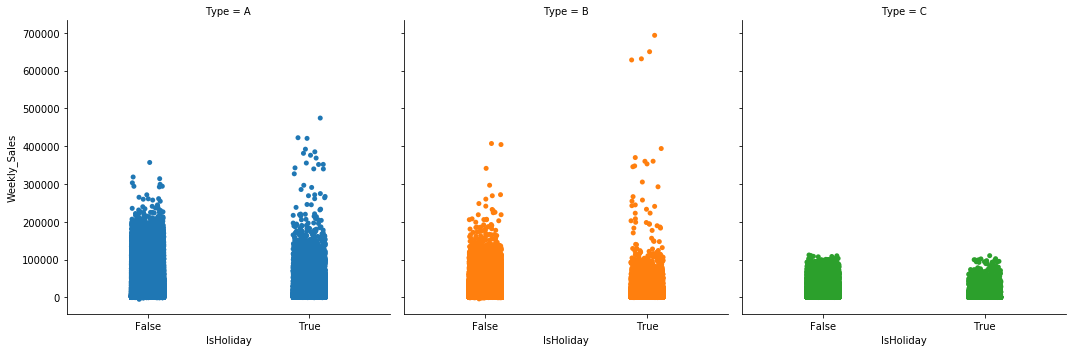

In [52]:
sns.catplot(data =walmart, x='IsHoliday', y='Weekly_Sales', hue='Type', col='Type')
plt.show()

- Weekly_Sales do increase on holidays for store Type A and B 
- Store Type C has relatively less sales on holidays

<a id='sale_vs_dayOfWeek'></a>
## How do sales vary by day of the week? 

- Are sales very different on Monday vs Tuesday?
- Impact of day_of_week column



In [53]:
y_min = walmart['Weekly_Sales'].min()
y_max = walmart['Weekly_Sales'].max()

y_min, y_max

# what does Weekly_Sales < 0 mean?


(-4988.94, 693099.36)

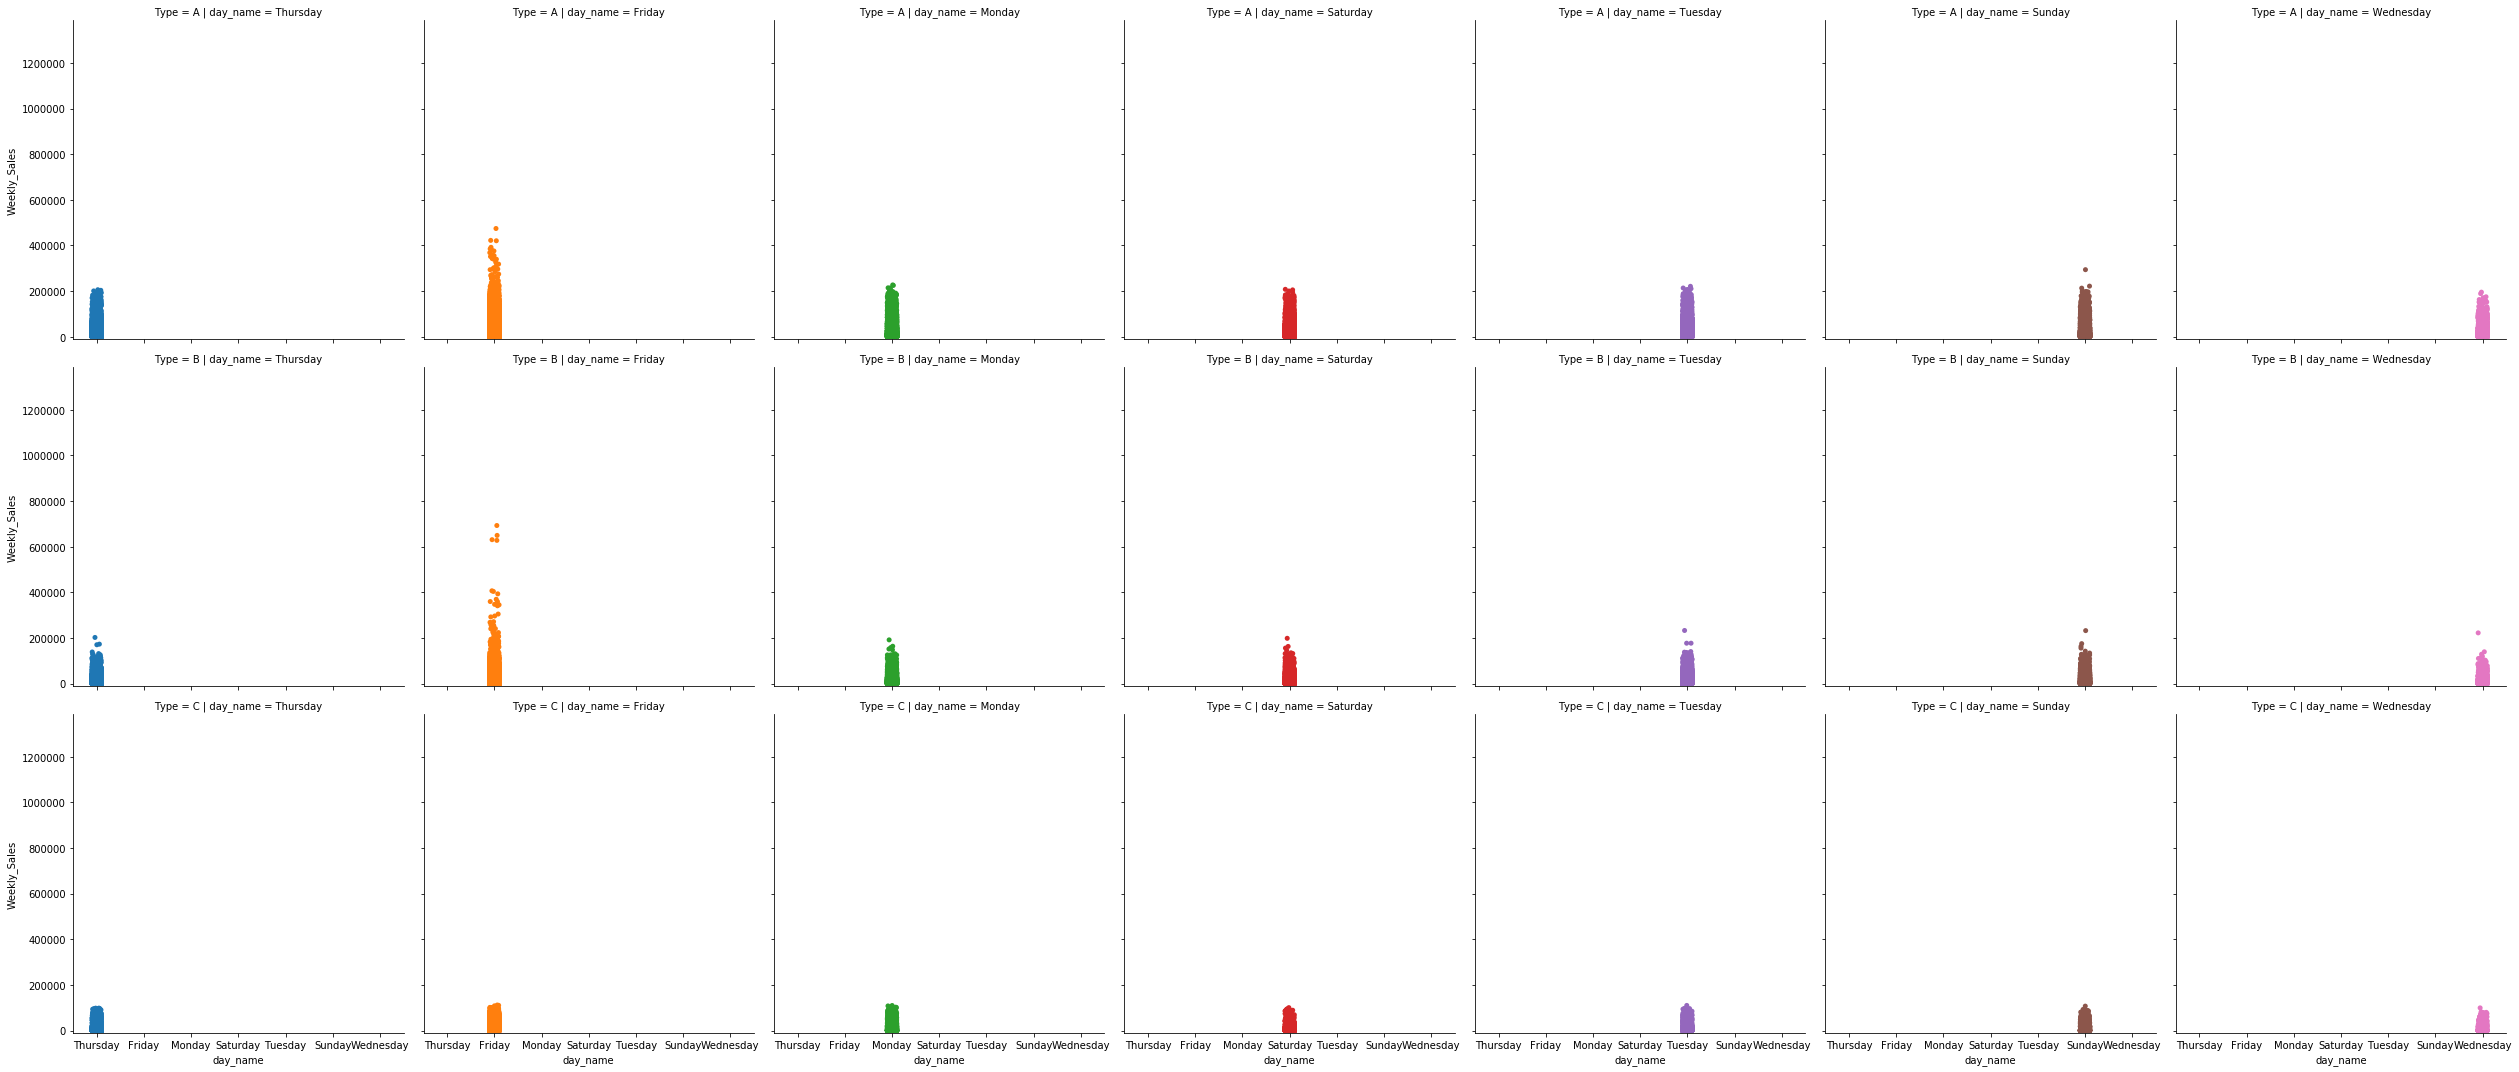

In [54]:
sns.catplot(data=walmart, x='day_name', y='Weekly_Sales', hue='day_name', col='day_name', row='Type')
plt.ylim(y_min*2, y_max*2)
plt.show()


- All stores have almost same sales everyday. 
- The increase in sales of Store Type A and store Type B  is on 'Fridays'
- Store Type 'C' has consistent sales amount throughout the week including Fridays

<a id='sale_vs_store_size'></a>
## How does the Size of Store Impacts its sales? 

- Impact of Type and Size of Store


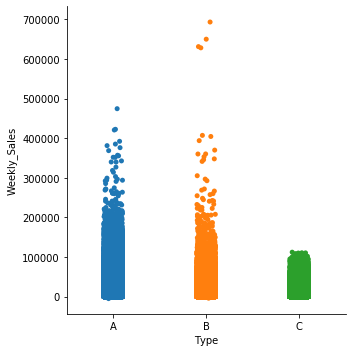

In [55]:
sns.catplot(data=walmart, x='Type', y ='Weekly_Sales', hue='Type')
plt.show()

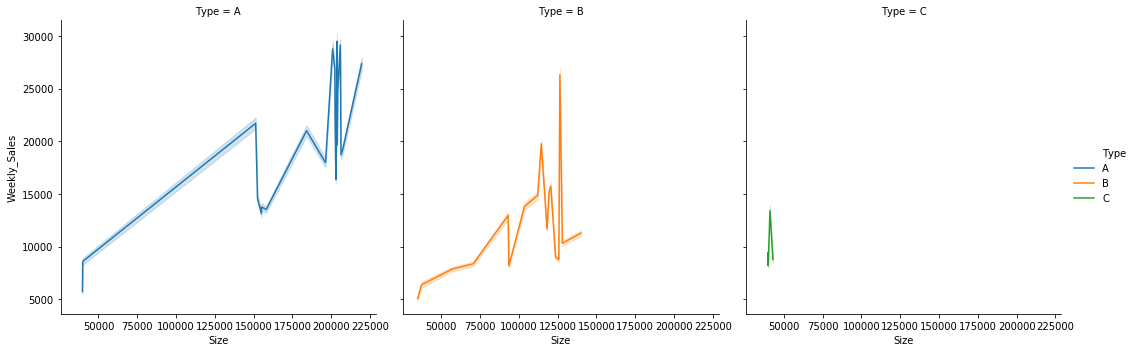

In [56]:
sns.relplot(data= walmart, y='Weekly_Sales', x='Size', hue='Type', kind='line', col='Type')
plt.show()

<a id='weekend_sale'></a>
## How are sales on Weekend? 

- Derived Weekend column and see impact of weekend on sales


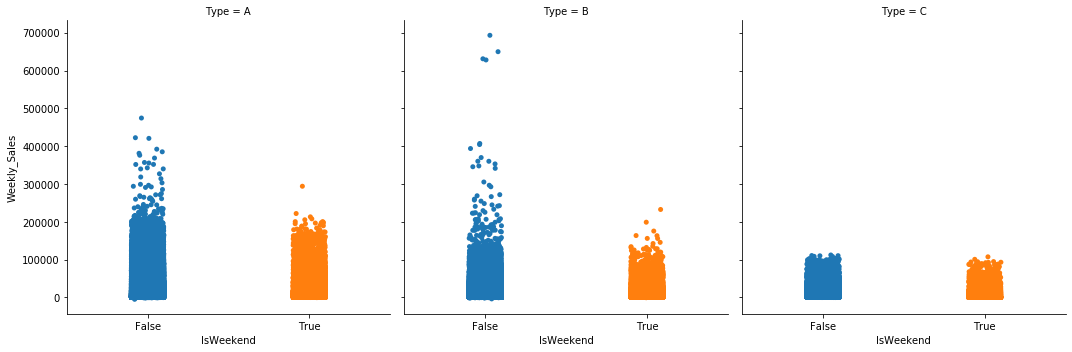

In [57]:
sns.catplot(data=walmart, x='IsWeekend', y ='Weekly_Sales', hue='IsWeekend', col='Type')
plt.show()

- Weekend has no impact on sales. Infact sales are less on weekends.

<a id='sale_vs_cat_cols'></a>
## Visualize combined impact of different categorical varibales on sales


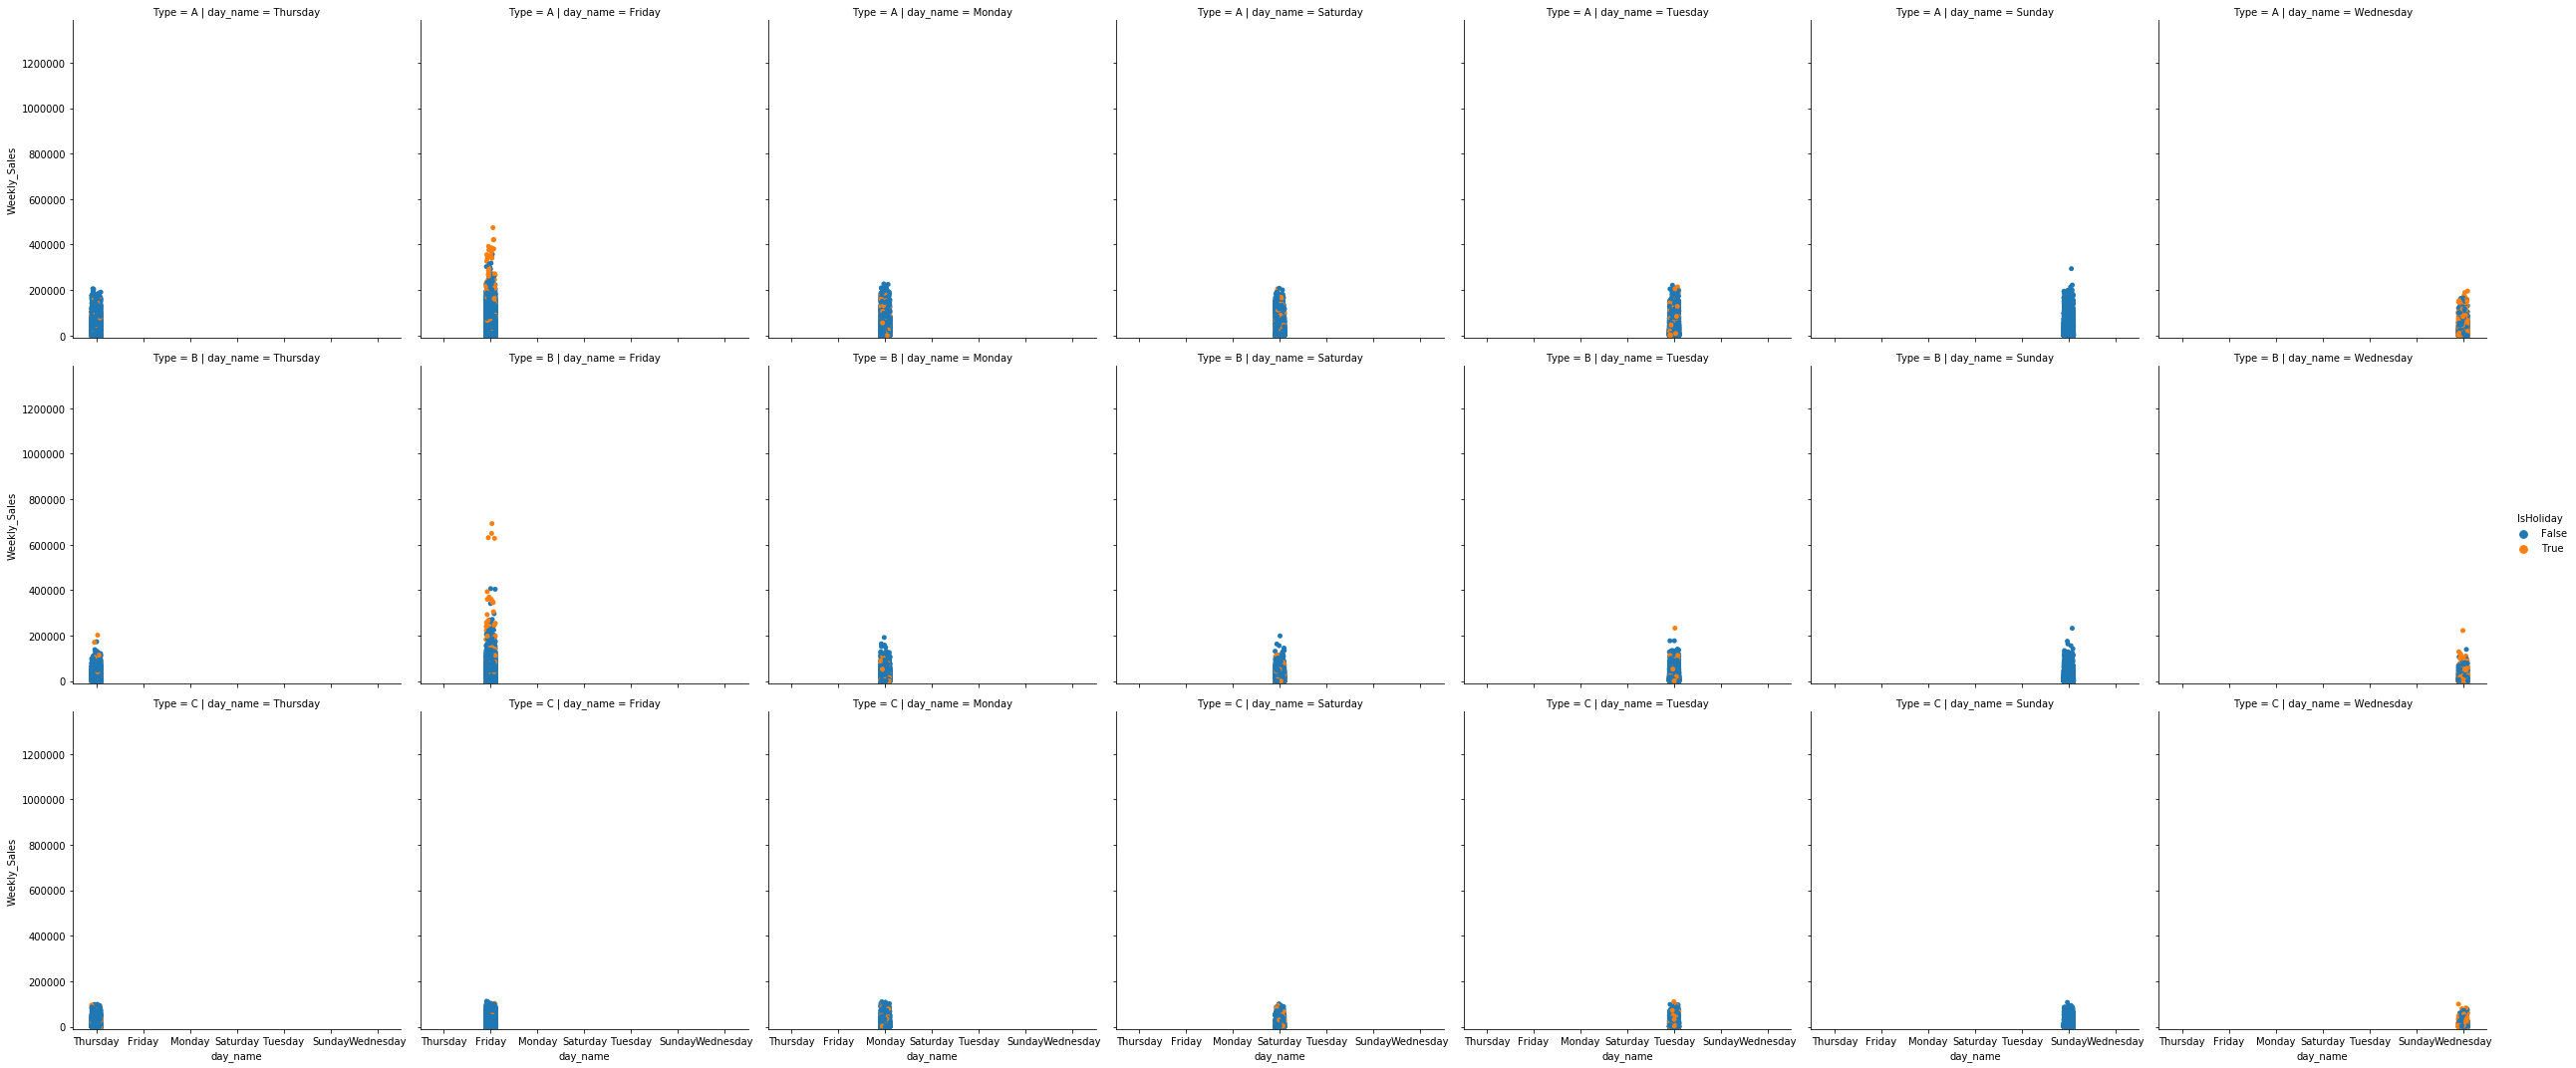

In [58]:
sns.catplot(data=walmart, x='day_name', y='Weekly_Sales', hue='IsHoliday', col='day_name', row='Type')
plt.ylim(y_min*2, y_max*2)
plt.show()



- The increased sales on Friday in Store Type A and B coincides with holidays

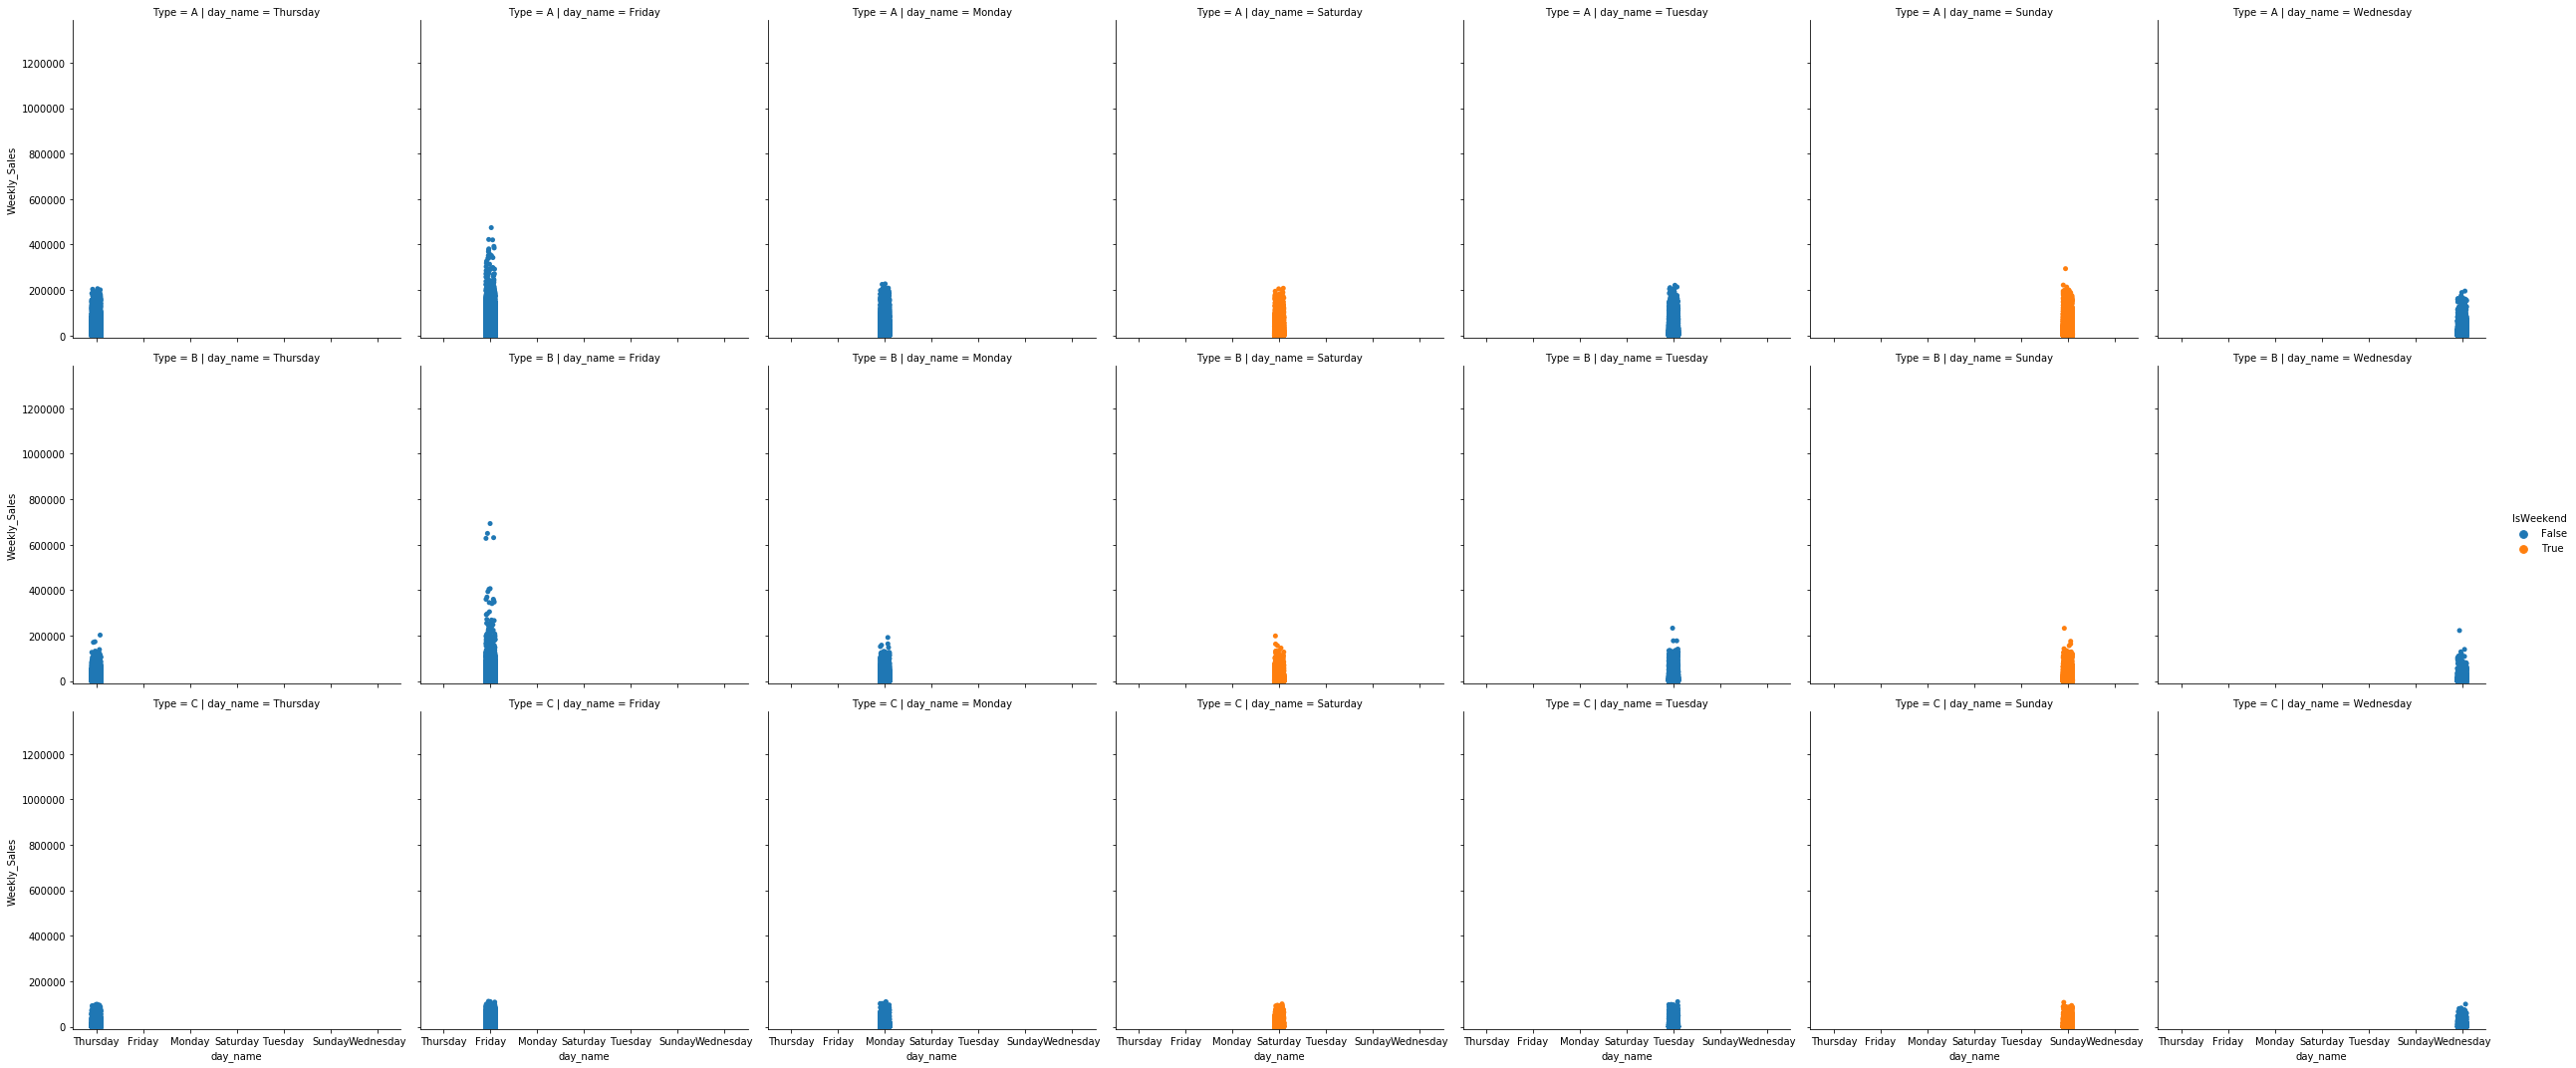

In [59]:
sns.catplot(data=walmart, x='day_name', y='Weekly_Sales', hue='IsWeekend', col='day_name', row='Type')
plt.ylim(y_min*2, y_max*2)
plt.show()

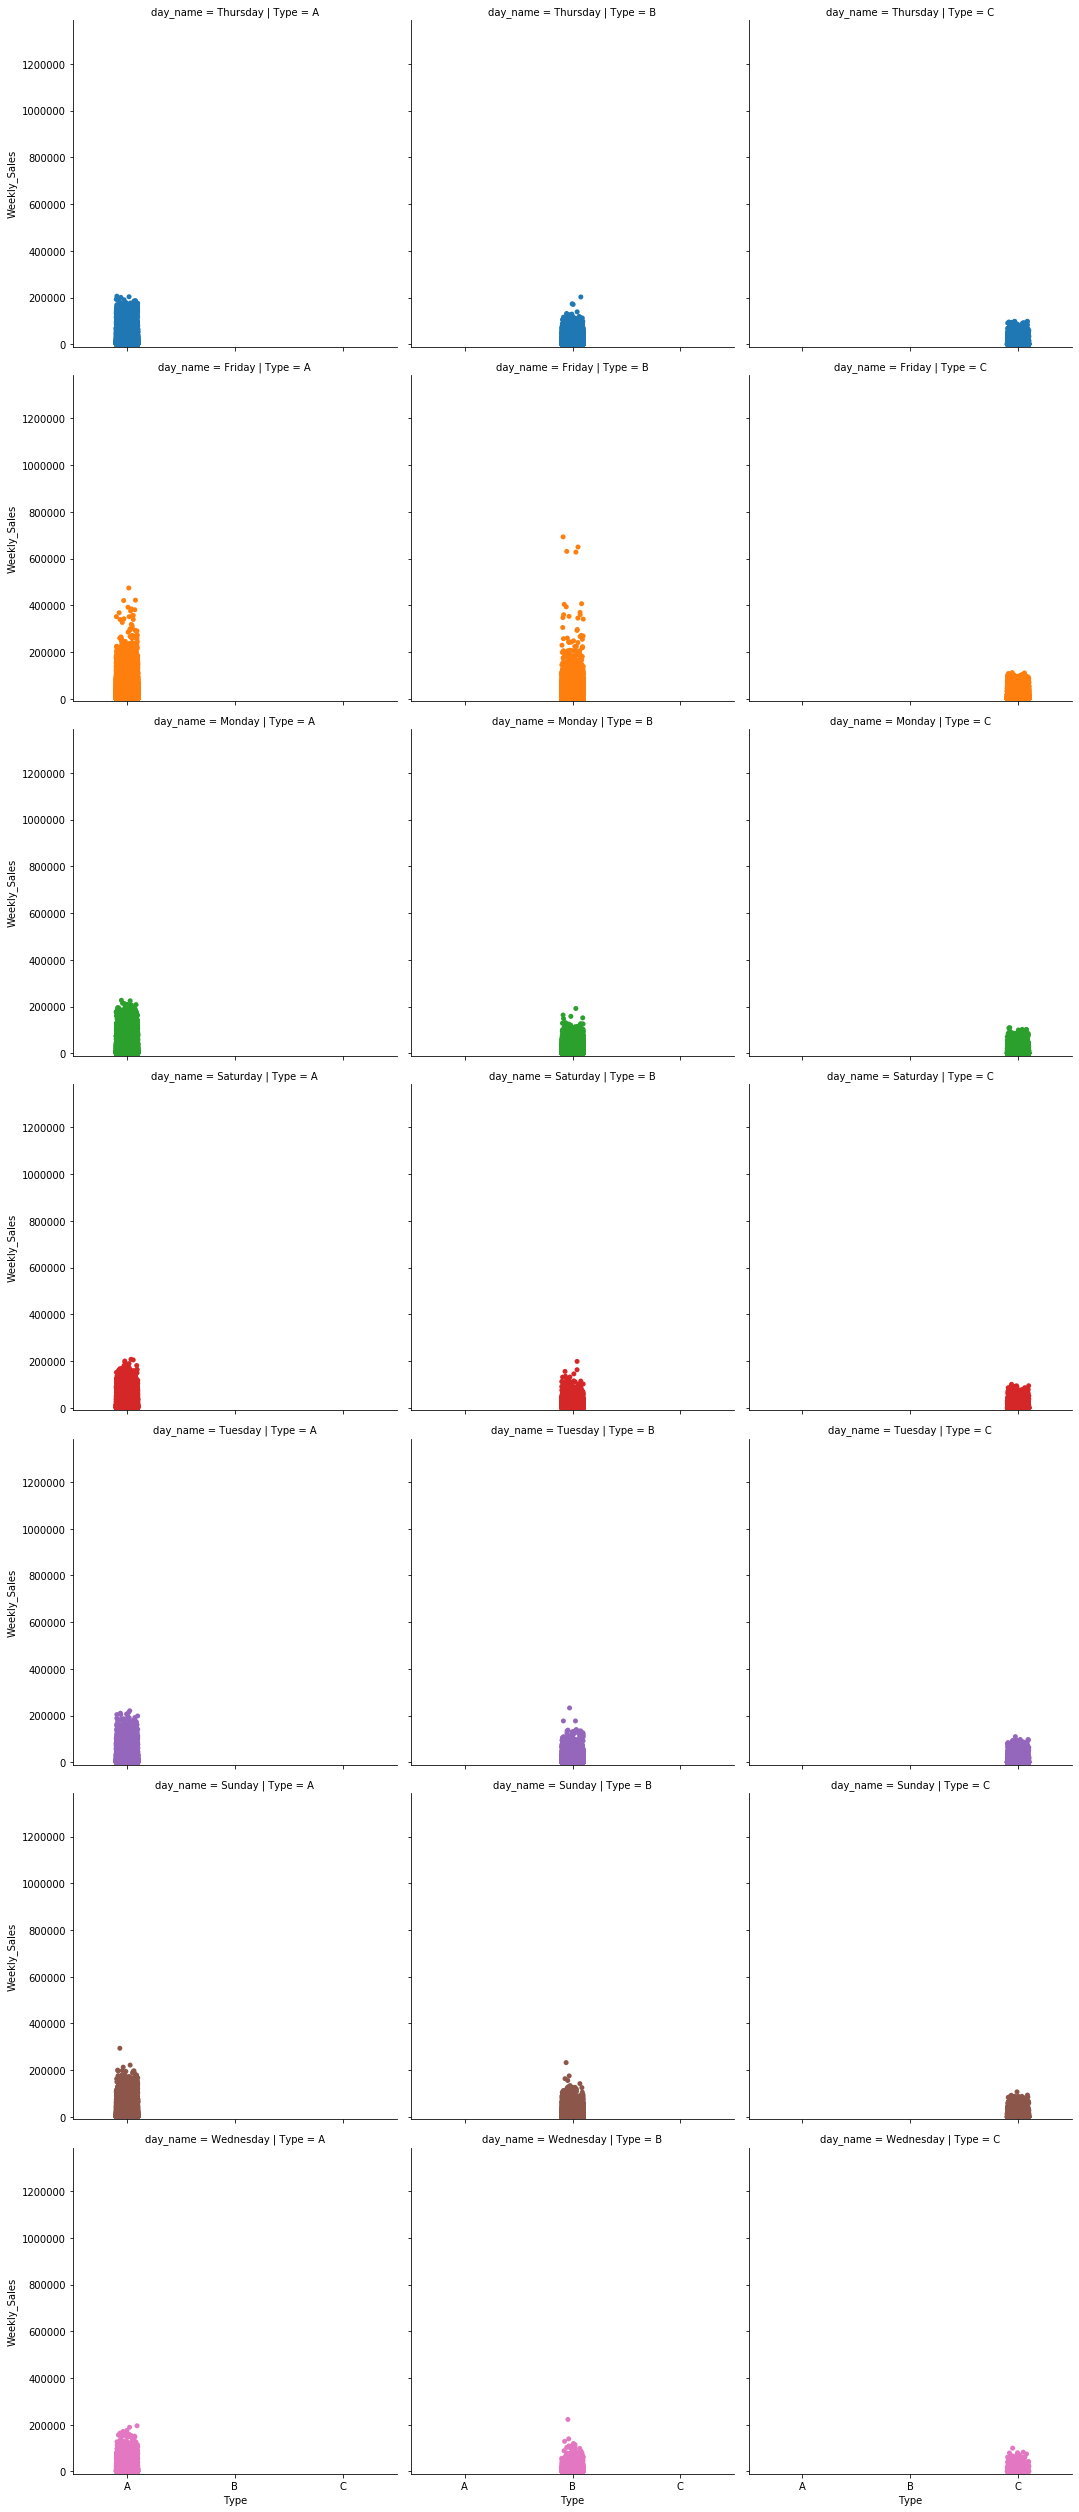

In [60]:
sns.catplot(data=walmart, x='Type', y='Weekly_Sales', hue='day_name', col='Type', row='day_name')
plt.ylim(y_min*2, y_max*2)
plt.show()

- Increased sales for store Type A and store Type B are only on Fridays when its holiday

<a id='sale_per_day'></a>
## Number of Sales per Date 

In [61]:
walmart_date = pd.DataFrame({'sale_count': walmart.groupby(['Date', 'Type'])['Weekly_Sales'].size()}).reset_index()

In [62]:
len(walmart_date['Date'].unique())

143

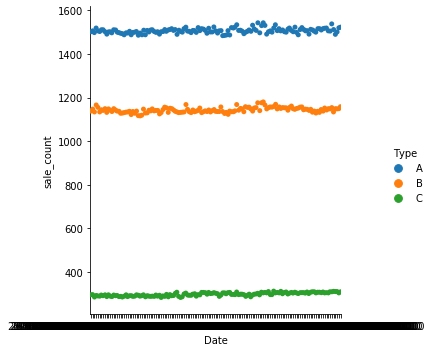

In [63]:
sns.catplot(data=walmart_date, x='Date', y='sale_count', hue='Type')
plt.show()

- Number of sales are consistent across each store on unique dates in the dataset 

<a id='monthly_sale'></a>
## Monthly Number of Sales 

In [64]:
walmart_date['month'] = walmart_date['Date'].dt.month
walmart_date.head()

,Date,Type,sale_count,month
0,2010-01-10,A,1502,1
1,2010-01-10,B,1138,1
2,2010-01-10,C,295,1
3,2010-02-04,A,1506,2
4,2010-02-04,B,1147,2


In [65]:
monthly_sale = pd.DataFrame({'sale_count':walmart_date.groupby(['month','Type'])['sale_count'].sum()}).reset_index()

In [66]:
monthly_sale.head()

,month,Type,sale_count
0,1,A,15015
1,1,B,11420
2,1,C,2967
3,2,A,16637
4,2,B,12661


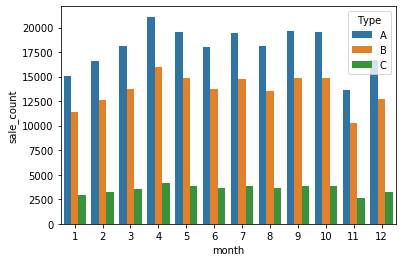

In [67]:
sns.barplot(data = monthly_sale, x='month',y ='sale_count', hue='Type')
plt.show()

<a id='conc'></a>

# Final Conclusion
- Overall Sales in Store Type A  > Store Type B > Store Type C
- Number of sales are consistent in each store Type; meaning there is not a significant increase in the number of sales on any particular date. Though number of sales are higher for all stores in April.
- In store Type A and B higher weekly sales are on Fridays when its a holiday. In other words the increased sales are just when its a holiday and people are shopping on Friday.
- Store size has no impact on weekly_sales 
- Weekly_sales are low in weekends for all store types

In [68]:
#store data for other notebooks
walmart.to_pickle('data/w_data.pkl')